# ¿Qué es la limpieza de datos?

Es el proceso de depurar el conjunto de datos para corregir errores, eliminar inconsistencias y garantizar su calidad. 

Antes de aplicar cualquier análisis o modelo, los datos deben estar limpios y en formato adecuado.

La limpieza de datos, o data cleaning en inglés, es el conjunto de procesos que permiten corregir o eliminar aquellas muestras erróneas de
una base de datos. 

Estos procesos permiten identificar datos incompletos, incorrectos, inexactos o no pertinentes, con el fin de eliminarlos o
corregirlos y así obtener bases de datos de mayor calidad.

Es esencial preparar los datos sin procesar para las aplicaciones de Modelos de machine learning (ML) y de inteligencia empresarial (BI). 

Es posible que los datos sin procesar contengan numerosos errores, que pueden afectar a la precisión de los modelos de ML y dar lugar a predicciones incorrectas y a un impacto empresarial negativo. 

Algunos pasos claves para la limpieza de datos son modificar y eliminar campos de datos incompletos e incorrectos, identificar y eliminar información duplicada y datos sin relación, y corregir el formato, los valores faltantes y los errores de ortografía.



| Problema                    | Descripción breve                                      |
| --------------------------- | ------------------------------------------------------ |
| Valores nulos (`NaN`)       | Faltan datos: se deben imputar o eliminar              |
| Tipos incorrectos           | String que debería ser número, fechas en texto, etc.   |
| Duplicados                  | Filas o registros repetidos                            |
| Texto inconsistente         | Espacios, mayúsculas, errores tipográficos             |
| Outliers (valores extremos) | Valores fuera de escala que afectan la media           |
| Variables inútiles          | Columnas con un solo valor o sin información relevante |


# Por qué es importante la limpieza de datos?

Cuando se desea usar datos para impulsar la toma de decisiones, es fundamental que  se usen datos relevantes, completos y precisos. 

Sin embargo, los conjuntos de datos suelen contener errores que tienen que eliminarse antes del análisis. Pueden incluir errores de formato, como fechas, cantidades monetarias y otras unidades de medida escritas incorrectamente que puedan repercutir de forma significativa en las predicciones. 

Los valores atípicos son una preocupación particular, pues siempre distorsionan los resultados. 

Otros errores que suelen verse en los datos son los puntos de datos corruptos, información faltante y errores tipográficos. Los datos limpios pueden ser de utilidad con modelos de ML muy precisos. 

Los datos limpios y precisos son esenciales sobre todo para entrenar modelos de ML, ya que el uso de conjuntos de datos de entrenamiento de mala calidad puede llevar a predicciones erróneas en modelos implementados. Esta es la razón principal por la que los científicos de datos dedican una gran parte de su tiempo a preparar datos para el ML.

# Problemas comunes en datasets

| Problema              | Descripción                                           | Ejemplo                               |
| --------------------- | ----------------------------------------------------- | ------------------------------------- |
| Valores nulos (`NaN`) | Datos faltantes                                       | Cliente sin ingreso registrado        |
| Tipos incorrectos     | Formato no adecuado                                   | "25" como texto en vez de número      |
| Duplicados            | Filas repetidas                                       | Dos veces el mismo cliente            |
| Texto sucio           | Espacios, mayúsculas desiguales, errores tipográficos | `'  Mujer '` o `'MUJER'`              |
| Outliers              | Valores extremos que sesgan las métricas              | Un cliente con ingresos de 1 millón   |
| Columnas inútiles     | Sin variación o vacías                                | Todas las filas tienen el mismo valor |


# Limpieza de Datos con Pandas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [3]:
# Cargar dataset (asegúrate de tener el archivo en la misma carpeta)
train_data = pd.read_csv('train.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S


In [6]:
train_data.describe() #essto solo es paa las numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


## 1️⃣ Detección de valores nulos

## Qué es un valor nulo?

Un valor nulo representa la ausencia de datos. En Python/Pandas se representa como:

- NaN (Not a Number)

- None

- Cadenas vacías ''

- Texto como 'n/a', 'null', '--', etc. que no son nulos reales, pero pueden significar lo mismo. Los n/a si pregunto si es nulo, no me lo va a mostrar como tal porque es tipo texto

## ¿Cómo identificarlos?
```Python
train_data.isnull()         # Booleano por celda
train_data.isnull().sum()   # Conteo por columna
train_data.info()           # También muestra nulos como "Non-Null Count"
train_data.isna()           # 
train_data.isna().sum()

````



In [9]:
# Conteo de valores nulos por columna
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data.isnull().sum() / len(train_data)*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
train_data.shape


(891, 12)

## ¿Cómo decidir qué hacer con los nulos?

Depende de:

🔢 Tipo de variable (numérica, categórica, fecha, texto)

📈 Distribución (simétrica, con outliers)

📉 Proporción de nulos

🧠 Importancia de la variable

## 1. Eliminar nulos:

Consiste en descartar filas o columnas que contienen valores nulos. Es la técnica más simple y rápida, pero puede implicar pérdida de información.

🔹 Cuándo usar:
- Hay muy pocos registros afectados

- Los datos faltantes están en campos irrelevantes o filas incompletas

- No afecta significativamente el análisis

```Python
train_data.dropna()                      # Elimina filas con cualquier NaN
train_data.dropna(subset=['columna'])    # Solo si falta una columna específica
train_data.drop(columns=['columna']) 
```

## 2. Rellenar con un valor fijo (mean, median, mode)

🔹 2.1 Rellenar con media (solo si no hay outliers)

Sustituye los valores nulos por el promedio (media aritmética) de la columna.

🔹 Cuándo usar:

- En variables numéricas con distribución simétrica

- Cuando no hay outliers extremos que distorsionen la media

```Python

train_data['edad'].fillna(train_data['edad'].mean(), inplace=True)

```

🔹 2.2 Rellenar con mediana (más robusta ante outliers)

Sustituye los nulos con la mediana, que es el valor central de la distribución.

🔹 Cuándo usar:

- Cuando la variable numérica tiene outliers o es asimétrica

- Para evitar que los extremos influyan en la imputación

```Python
train_data['edad'].fillna(train_data['edad'].median(), inplace=True)

```

🔹 2.3 Rellenar con moda (para variables categóricas)

Imputa los nulos con el valor que más se repite en la columna (la moda).

🔹 Cuándo usar:

- En variables categóricas o texto repetitivo

- Cuando hay un valor dominante que representa la mayoría

```Python
train_data['embarque'].fillna(train_data['embarque'].mode()[0], inplace=True)

```

## 3. Rellenar con una constante personalizada

Se reemplazan los valores nulos con un valor fijo elegido por el analista, como "Desconocido" o 0.

🔹 Cuándo usar:

- Cuando el nulo significa "no aplica", "desconocido" o ausencia lógica

- Para marcar valores imputados explícitamente

```Python
train_data['garage_area'].fillna(0, inplace=True)
train_data['ocupacion'].fillna("Desconocido", inplace=True)
```



## 4. Interpolación (lineal, temporal, spline)

Rellena los valores nulos calculando valores intermedios entre datos conocidos. Especialmente útil para series ordenadas.

🔹 Cuándo usar:

- Variables numéricas continuas

- Fechas, tiempo o secuencias ordenadas

- Datos físicos como temperatura, velocidad, etc.

```Python
train_data['temperatura'] = train_data['temperatura'].interpolate(method='linear')

```

## 5. Imputación por vecinos cercanos (KNN)

Completa los nulos usando la media de los valores más cercanos (vecinos) según otras variables. Usa un algoritmo KNN para encontrar similitudes.

🔹 Cuándo usar:

- Dataset complejo y multivariable

- Cuando hay relaciones entre columnas

- Queremos una estimación realista basada en contexto

```Python
from sklearn.preprocessing import StandardScaler

# Escalar variables para mejorar la imputación
cols = ['age', 'fare', 'pclass']
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data[cols]), columns=cols)

# Imputar
imputer = KNNImputer(n_neighbors=5)
train_data[cols] = imputer.fit_transform(train_data_scaled)

```

| Estrategia            | Recomendado para                                 | Precauciones                      |
| --------------------- | ------------------------------------------------ | --------------------------------- |
| `dropna()`            | Pocos nulos, no afecta el análisis               | Pierdes datos                     |
| `fillna(mean)`        | Números simétricos, sin valores extremos         | Afecta si hay outliers            |
| `fillna(median)`      | Datos sesgados o con valores extremos            | No siempre capta la distribución  |
| `fillna(mode)`        | Categóricas o con valores muy frecuentes         | Puede sobre-representar un valor  |
| `interpolate()`       | Series temporales o datos ordenados              | No funciona bien con categóricas  |
| `KNNImputer()`        | Modelado basado en similitud entre observaciones | Necesita buen preprocesamiento    |
| `.replace()` + `.str` | Para limpiar valores numéricos enmascarados      | Requiere cuidado con los símbolos |


In [12]:
from sklearn.preprocessing import StandardScaler


Vamos a imputar cada columna con un método distinto, aprovechando el contexto y la naturaleza de cada variable:



1. Age: Imputación por mediana

La edad tiene una distribución sesgada (outliers en niños y mayores), por lo que usaremos la mediana para no distorsionar la media.

In [13]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

C:\Users\vik_p\AppData\Local\Temp\ipykernel_14472\127112235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)


In [14]:
train_data['Age'].isnull().sum()

np.int64(0)

2. Cabin: Imputación con constante personalizada

La mayoría de valores están ausentes (~77%). Esto puede significar que muchas personas no tenían cabina asignada. Usamos una categoría "Desconocido".

In [15]:
train_data['Cabin'].fillna('Desconocido', inplace=True)


C:\Users\vik_p\AppData\Local\Temp\ipykernel_14472\2585966328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('Desconocido', inplace=True)


In [16]:
train_data['Cabin'].isnull().sum()

np.int64(0)

In [17]:
cabin_unknown = train_data[train_data['Cabin']=='Desconocido']
cabin_unknown.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,Desconocido,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.5500,Desconocido,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,Desconocido,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,Desconocido,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,Desconocido,S


 3. Embarked: Imputación con moda
 
Solo hay 2 valores faltantes. Se trata de una variable categórica con 3 categorías principales (S, C, Q). Usamos la moda (valor más frecuente).

In [18]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

C:\Users\vik_p\AppData\Local\Temp\ipykernel_14472\47354518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [19]:
train_data['Embarked'].isnull().sum()


np.int64(0)

In [20]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

## 2️⃣  ¿Qué es un outlier?

Un outlier (valor atípico o extremo) es un dato que se desvía significativamente del resto de los datos en una variable. 

Puede ser un error, un valor legítimo inusual, o una observación que merece atención especial.

🧠 ¿Por qué son importantes?

- Afectan medidas sensibles como la media y la desviación estándar

- Pueden sesgar resultados de modelos estadísticos

- Algunas veces representan errores de entrada o medición

- Otras veces, revelan casos especiales que deben ser analizados aparte



¿Cómo identificamos un outlier?

1. 📊 Visualmente

Boxplot

Qué es un Boxplot (diagrama de caja y bigotes)?

Un boxplot es una representación gráfica que resume la distribución de un conjunto de datos numéricos. Muestra los cuartiles, la mediana, y los valores extremos (outliers).

¿Qué muestra un boxplot?

- Caja (box): representa el rango intercuartílico (IQR): del 25% (Q1) al 75% (Q3)

- Línea dentro de la caja: es la mediana (Q2), el valor central

- Bigotes (whiskers): se extienden hasta el valor más bajo y más alto dentro de 1.5 × IQR

- Puntos individuales: son los outliers, valores fuera de los bigote

<Axes: xlabel='Age'>

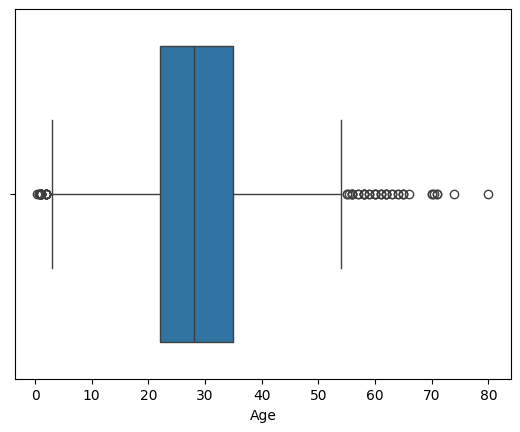

In [21]:
sns.boxplot(x=train_data['Age'])

<Axes: xlabel='Fare'>

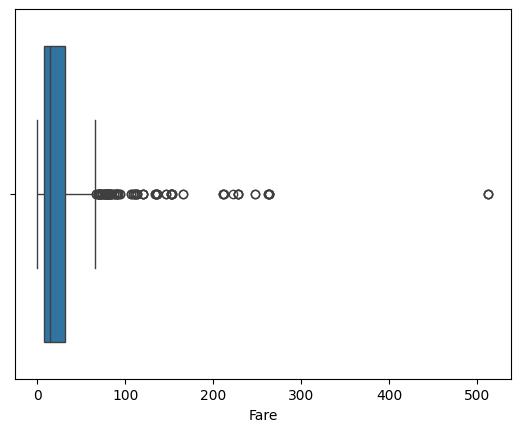

In [22]:
sns.boxplot(x=train_data['Fare'])

Histograma:

Un histograma es un gráfico de barras que agrupa los datos numéricos en intervalos (bins) y cuenta cuántas observaciones caen en cada uno.

¿Qué muestra un histograma?

- El eje X representa los valores de la variable (agrupados por intervalos)

- El eje Y muestra la frecuencia (cuántas veces aparece un valor dentro del rango)

<Axes: >

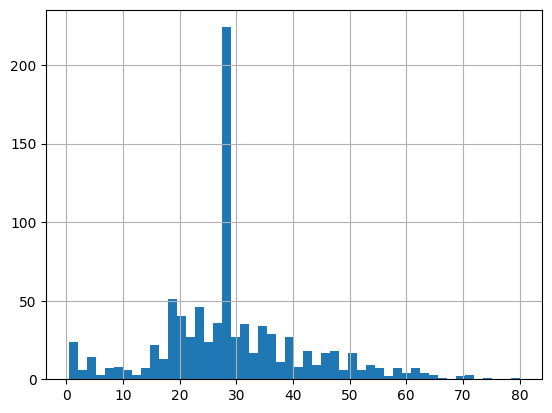

In [23]:
train_data['Age'].hist(bins=50)

<Axes: >

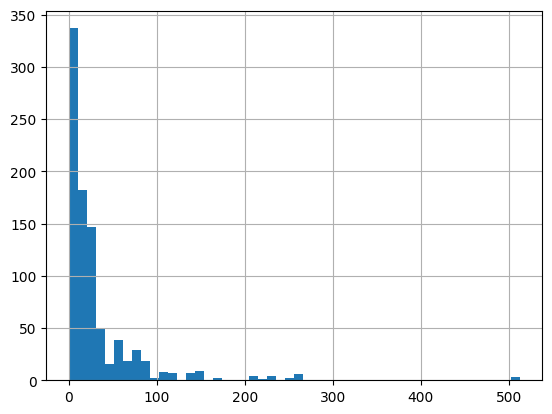

In [24]:
train_data['Fare'].hist(bins=50)

2. 🧮 Usando el rango intercuartílico (IQR)

Fórmula:

Un valor es outlier si:

Limite superio:  x < Q1−1.5⋅IQR 
 
Limite inferior:  x >Q3+1.5⋅IQR


Donde:

- Q1: primer cuartil (25%)

- Q3: tercer cuartil (75%)

- IQR = Q3 - Q1

In [25]:
Q1  = train_data['Fare'].quantile(0.25)
Q3  = train_data['Fare'].quantile(0.75)
IRQ = Q3 - Q1

In [26]:
lower = Q1 - 1.5 * IRQ
upper = Q3 + 1.5*IRQ

In [27]:
outliers_fare = train_data[(train_data['Fare']<lower) | (train_data['Fare']>upper)]
outliers_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,Desconocido,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,Desconocido,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,Desconocido,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,Desconocido,S


In [28]:
# Límites
Q3

np.float64(31.0)

In [29]:
Q1

np.float64(7.9104)

In [30]:
# Age
Q1  = train_data['Age'].quantile(0.25)
Q3  = train_data['Age'].quantile(0.75)
IRQ = Q3 - Q1
lower_age = Q1 - 1.5 * IRQ
upper_age = Q3 + 1.5*IRQ
outliers_age = train_data[(train_data['Age']<lower_age) | (train_data['Age']>upper_age)]
outliers_age 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,Desconocido,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,Desconocido,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Desconocido,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,Desconocido,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,Desconocido,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,Desconocido,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,Desconocido,S


 ¿Qué hacer con un outlier?

 | Estrategia                | Cuándo usar                                             |
| ------------------------- | ------------------------------------------------------- |
| 📤 Eliminarlo             | Si es un error claro o si distorsiona mucho el análisis |
| 🧱 Rellenarlo o limitarlo | Si se conoce el valor correcto o se desea truncar       |
| 🧭 Reemplazar por límites | Capping: reemplazar por percentiles                     |
| 🧠 Mantenerlo             | Si es un caso válido e importante (ej. millonarios)     |
| 🎯 Usar métricas robustas | Mediana, rango intercuartílico en lugar de media        |


### Eliminación de outliers en Age

In [31]:
train_data = train_data[(train_data['Age']>= lower_age) & (train_data['Age']<=upper_age) ]

<Axes: xlabel='Age'>

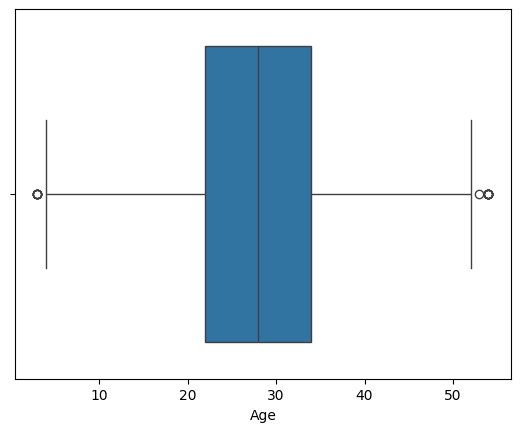

In [32]:
sns.boxplot(x=train_data['Age'])

### Reemplazo por los limites en Fare

In [33]:
train_data['Fare']=train_data['Fare'].apply(lambda x:lower if x<lower else upper if x>upper else x)

<Axes: xlabel='Fare'>

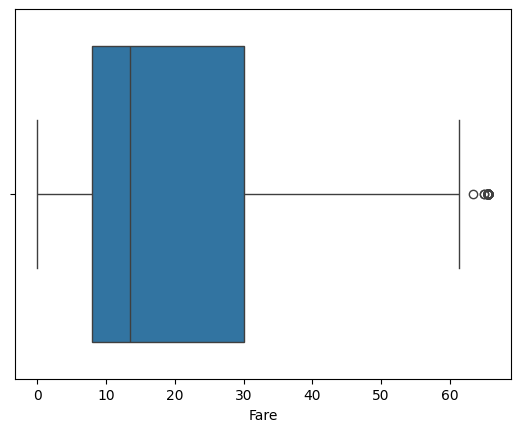

In [34]:
sns.boxplot(x=train_data['Fare'])

### 3. Duplicados

La revisión de duplicados consiste en identificar y tratar filas que están repetidas dentro de un DataFrame. 

Esto es una parte esencial de la limpieza de datos, ya que los registros duplicados pueden:

Distorsionar estadísticas (por ejemplo, contar dos veces a una persona)

Aumentar el tamaño del dataset innecesariamente

Afectar el rendimiento de los modelos

### ¿Qué significa que una fila esté duplicada?

Una fila se considera duplicada cuando todas las columnas tienen exactamente el mismo valor que otra fila anterior. Ejemplo:

| PassengerId | Name       | Sex  | Age |                 |
| ----------- | ---------- | ---- | --- | --------------- |
| 1           | Allen, Mr. | male | 35  |                 |
| 2           | Smith, Mr. | male | 42  |                 |
| 2           | Smith, Mr. | male | 42  | ✅ **duplicado** |



¿Cómo detectarlo en Pandas?

``` Python
train_data.duplicated()               # Devuelve True si la fila está duplicada
train_data.duplicated().sum()         # Total de duplicados
train_data[train_data.duplicated()]           # Ver sólo las filas duplicadas

```

In [35]:
train_data.duplicated().sum()

np.int64(0)

In [36]:
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 4. Data preprocessing

¿Qué es el preprocesado de datos?

El preprocesado es la fase del análisis donde transformamos, simplificamos o enriquecemos las variables del dataset, para que:

Sean más informativas

Sean más fáciles de interpretar

Sean más útiles para análisis y modelado

### Extracción del título desde Name

🧠 ¿Por qué extraer el título?

La columna Name contiene texto libre, pero encierra información valiosa que no es directamente utilizable por un modelo o por una tabla analítica.

Ejemplo: "Allen, Mr. William Henry"

Podemos extraer "Mr" como título o tratamiento, y eso nos permite:

In [37]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.') #buscan patrones que terinan en . como mr. se llaman regex 
train_data['Title'].sample(5)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\vik_p\AppData\Local\Temp\ipykernel_14472\2204007596.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.') #buscan patrones que terinan en . como mr. se llaman regex


540      Miss
104        Mr
290      Miss
796        Dr
165    Master
Name: Title, dtype: object

In [38]:
train_data['Title'].value_counts()


Title
Mr          489
Miss        169
Mrs         118
Master       26
Dr            7
Rev           5
Major         2
Mlle          2
Don           1
Ms            1
Mme           1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [39]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Mme', 'Mlle', 'Don', 'Major', 'Sir', 'Rev'] , 'Raros') #sustituyo por raros los valores que no sonconocidos

In [40]:
train_data['Title'].value_counts()


Title
Mr        489
Miss      169
Mrs       118
Master     26
Raros      15
Dr          7
Ms          1
Name: count, dtype: int64

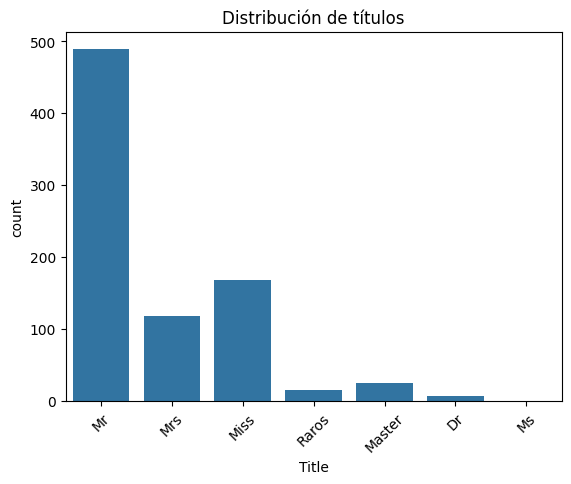

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_data, x='Title')
plt.title("Distribución de títulos")
plt.xticks(rotation=45)
plt.show()



### Análisis de la variable FamilySize

Es una variable derivada que representa el tamaño de la familia de cada pasajero a bordo. Se calcula así:

FamilySize = SibSp + Parch + 1

Donde:

SibSp: número de hermanos o cónyuges a bordo

Parch: número de padres o hijos a bordo

+1: representa al propio pasajero

¿Por qué es útil?

Beneficio	Explicación

🎯 Mejora el análisis de supervivencia	Las personas solas tienen distintos patrones

🧪 Genera una variable predictiva	Se ha demostrado útil en modelos de ML

📊 Permite clasificaciones como: solo, pequeña familia, numerosa	


1. Crear la variable FamilySize

In [42]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize'].value_counts()


FamilySize
1     505
2     153
3      90
4      23
6      17
5      14
7      11
11      7
8       5
Name: count, dtype: int64

2. Explorar la distribución

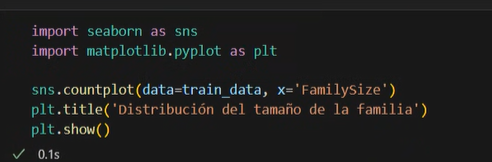

3. ¿Influye en la supervivencia?

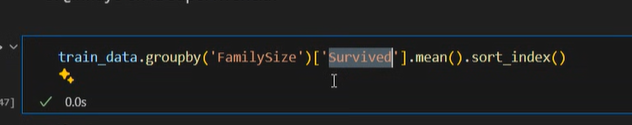

4. Crear variable binaria IsAlone

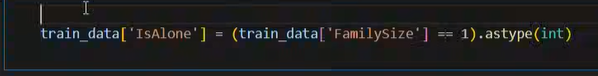

 5. Visualizar con gráfico de barras

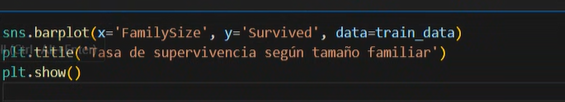

| Tamaño de familia | Tasa de supervivencia | Interpretación                                                                                   |
| ----------------- | --------------------- | ------------------------------------------------------------------------------------------------ |
| **1**             | \~0.3                 | **Viajar solo** disminuía mucho la probabilidad de sobrevivir.                                   |
| **2–4**           | \~0.55–0.7            | **Pequeñas familias** tenían mayores tasas de supervivencia. Probablemente se ayudaban entre sí. |
| **5–6**           | \~0.2                 | **Familias grandes** tenían menos probabilidades. Tal vez más difícil coordinarse en el caos.    |
| **7+**            | Muy pocos datos       | Alta variabilidad (barras de error largas), los valores no son confiables estadísticamente.      |


In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconocido,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconocido,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconocido,S,Mr,1


##  Paso 5 – Guardar el dataset limpio

Ahora que hemos completado todo el proceso de limpieza y preprocesado, nuestro dataset está listo para ser usado en análisis exploratorio, visualización o incluso modelos predictivos.

Hemos aplicado múltiples transformaciones:

- Imputación de valores nulos (`Age`, `Embarked`, `Cabin`)
- Tratamiento de outliers (`Age` eliminado, `Fare` truncado)
- Extracción de información útil (`Title` desde `Name`, `FamilySize`, `IsAlone`)

Guardar el dataset limpio es una buena práctica porque:

- Conservamos una **versión final estructurada** para trabajar sin rehacer todo
- Evitamos mezclar datos crudos con datos tratados
)

A continuación, guardamos el DataFrame como un archivo `.csv`:

```python
train_data.to_csv("titanic_limpio.csv", index=False)


In [44]:
train_data.to_csv("titanic_limpio.csv", index=False)

     